# Deep learning applications in medical imaging: Ex.1

Due date: 28/3/23

Submitted by: Rafael Ashurov 312054711, Corinne Golan 302276159


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

print("opencv version: ",cv2.__version__)

opencv version:  4.7.0


## 1. Bluring an image

- Load the `zebra.jpeg` image in grayscale format and display it.


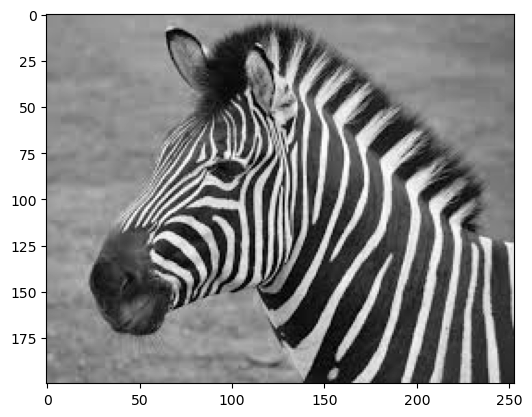

In [2]:
zebra = cv2.imread('zebra.jpeg', 0)
plt.imshow(zebra, cmap='gray')
plt.show()

- Use 3x3 box kernel (matrix of 3x3 with a value of 1/9 in each cell) to filter the image. Display the result.
- You can use cv2 functions.
- Repeat with different box filters: 5x5, 7x7, ..., 13x13. 

(use subplots to display the results nicely..)

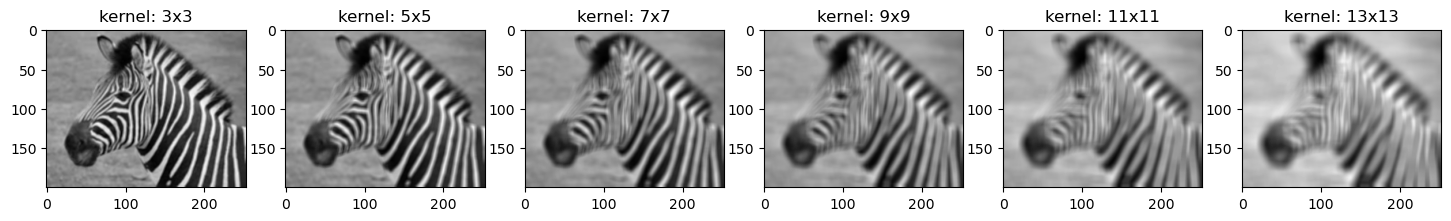

In [3]:
boxes_sizes = np.arange(3,15,2) # [ 3,  5,  7,  9, 11, 13]

fig, axes = plt.subplots(ncols=6, figsize=(18,5))

for i, k_size in enumerate(boxes_sizes):
    kernel = np.ones((k_size,k_size)) / (k_size*k_size)
    filtered_img = cv2.filter2D(zebra, -1, kernel)
    axes[i].imshow(filtered_img, cmap='gray')
    axes[i].set_title(f"kernel: {k_size}x{k_size}")
plt.show()

- Use Gaussian filter to blur the image. Try different sigma values:  
$$ \sigma  = 1, 2, 4, 6 $$

- Write a code for each sigma value and display the image, don't dispaly all images at the end (this is done to prevent a potential bug in one of cv2 guassian functions).

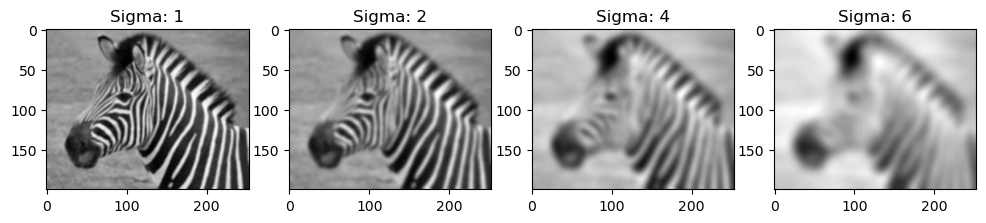

In [4]:
""" We didn't came across any bug so we printed the images in subplot to make it look better """

sigmas =[1,2,4,6]

fig, axes = plt.subplots(ncols=4, figsize=(12,5))

for i, sigma in enumerate(sigmas):
    filtered_shape = cv2.GaussianBlur(zebra, (0, 0), sigma) # If ksize is set to (0 0), then ksize is computed from sigma values
    axes[i].imshow(filtered_shape, cmap='gray')
    axes[i].set_title(f"Sigma: {sigma}")
plt.show()

## 2. Sobel filter

- Use the following kernel to filter the Zebra image:
$$ S_x = \begin{pmatrix}
-1 & 0 & 1\\ 
-2 & 0 & 2\\ 
-1 & 0 & 1 
\end{pmatrix}
$$
- Display the results. What do you think this filter does? (Write the answer in your own words and don't copy paste from another source)

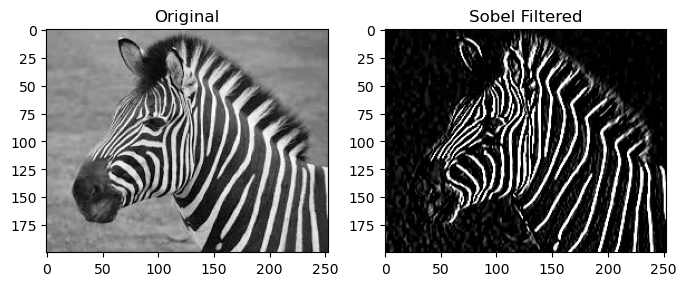

In [5]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtered_image = cv2.filter2D(zebra, -1, kernel)
# Display the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(zebra, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title('Sobel Filtered')
plt.show()

<font color="#5fbefe"> 
In general the Sobel filter is a type of edge detection filter that highlights edges in an image by computing the gradient magnitude of each pixel in the x and y directions. The resulting filtered image emphasizes areas of rapid intensity changes in the x and y directions, which correspond to edges in the original image. The filter achieves this by convolving the image with two kernels, one for the x-direction and one for the y-direction, which are used to compute the derivative in each direction. <br>
In our code we applied <b><u>only the kernel that computes the x-direction gradient changes</u></b>, this is why we clearly only edges of x-direction. Furthermore, in our zebra image the greatest intensity in gradient change are exactly in the border between the black and white zebra lines. This is why we see them so clearly comparing to the zebra's border with the grass.
</font>

## 3. Image gradients

- Load in grayscale format the `shape_clean.png` image
- Display the image
- Use Sobel filters to calculate the image gradients `Gx` and `Gy`

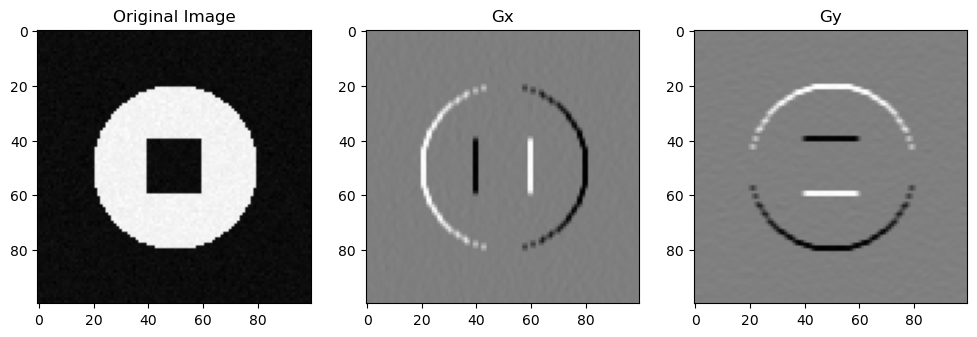

In [6]:
shape = cv2.imread('shape_clean.png', 0)

# Display the original image
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(shape, cmap='gray')
axs[0].set_title('Original Image')

# Define the Sobel kernels
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = Sx.T

# Apply the Sobel filters
Gx = cv2.filter2D(shape, cv2.CV_32F, Sx)
Gy = cv2.filter2D(shape, cv2.CV_32F, Sy)

# Display the gradient images
axs[1].imshow(Gx, cmap='gray')
axs[1].set_title('Gx')
axs[2].imshow(Gy, cmap='gray')
axs[2].set_title('Gy')
plt.show()

- Calculate and display the gradients' magnitudes: $$G = \sqrt{G_x^2 + G_y^2}$$

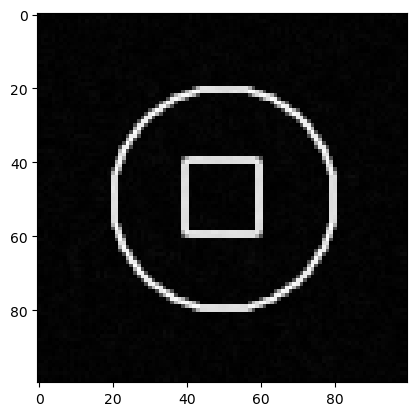

In [7]:
G = np.sqrt(Gx**2 + Gy**2)
plt.imshow(G, cmap='gray')

- Use `np.arctan2` to calculate the gradients' angles.
- Display the gradients field using `plt.quiver()` 

set the arrows scale factor for a nice results by adding scale = X (where X is scalar) as a last parameter in the function, depends on your code try using differnet scales until you find the right one (I used scale = 8000)

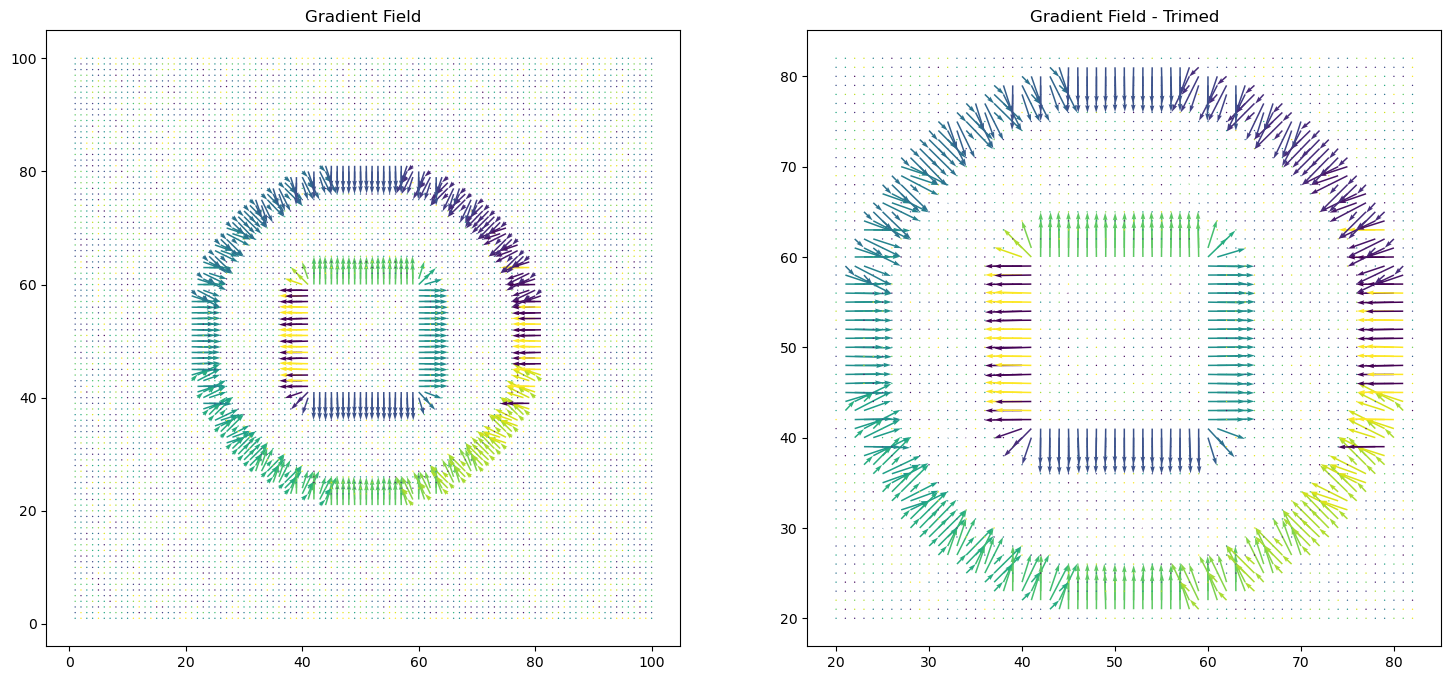

In [8]:
# Create the arrows x and y positions
x = np.arange(1,101,1)
y = np.arange(1,101,1)
X, Y = np.meshgrid(x,y)


# Compute the angle of each vector
angle = np.arctan2(Gy, Gx)

# Display the gradient field
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
axs[0].quiver(X, Y, Gx, Gy, angle, scale_units='xy', scale=200, color='g')
axs[0].set_title('Gradient Field')

# Display a trimmed version just to see the arrows a little bit better
# Trim the columns without the arrows outside the square
X_s = X.T[19:82].T[19:82]
Y_s = Y.T[19:82].T[19:82]
Gx_s = Gx.T[19:82].T[19:82]
Gy_s = Gy.T[19:82].T[19:82]
angle_s = np.arctan2(Gy_s, Gx_s)

axs[1].quiver(X_s, Y_s, Gx_s, Gy_s, angle_s, scale_units='xy', scale=200, color='g')
axs[1].set_title('Gradient Field - Trimed')
plt.show()

## Good Luck!